# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve


In [3]:
df = pd.read_csv("census.csv")
original_df = df.copy()
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [58]:
# The total number of records
print(df.shape)
df.shape[0]

(45222, 14)


45222

In [59]:
# The number of individuals making more than $50000 annually
df[df.income == ">50K"].shape[0]

11208

In [60]:
# The number of individuals making at most $50000 annually
df[df.income == "<=50K"].shape[0]

34014

In [61]:
# The percentage of individuals making at more than $50000 annually
df[df.income == ">50K"].shape[0] / df.shape[0]

0.2478439697492371

In [62]:
df.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [64]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [65]:
df.describe(exclude=[np.number])

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


### Exercise 2 Preprocessing 

#### 观察number数据并选择处理方式

##### 2.1 age

The skewness of the original data is 0.5328158942555792
The kurtosis of the original data is -0.15587445202596184


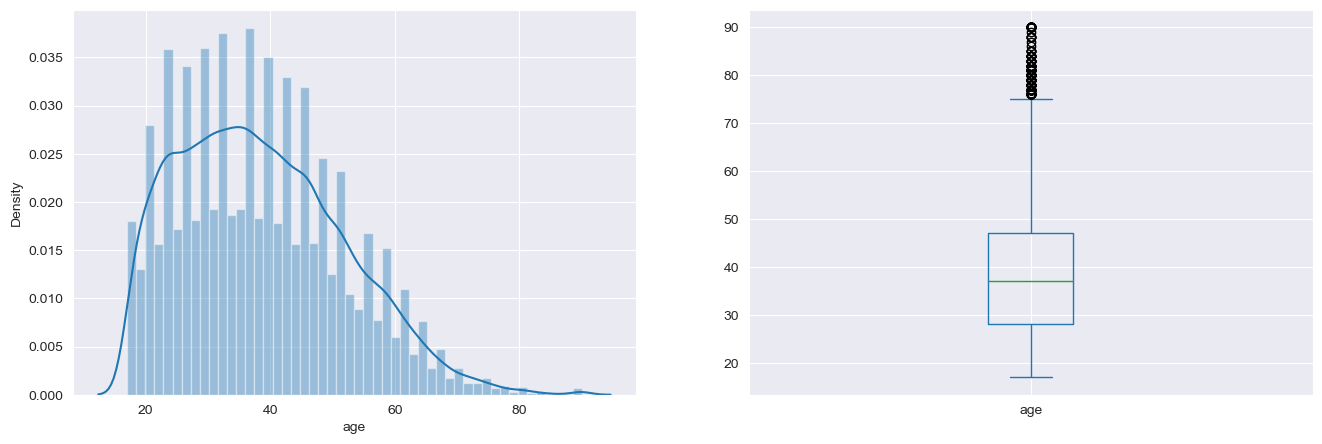

In [66]:
# Visualize skewed continuous features of original data
print("The skewness of the original data is {}".format(df.age.skew()))
print("The kurtosis of the original data is {}".format(df.age.kurt()))

plt.figure()
plt.subplot(121)
sns.distplot(df['age'])

plt.subplot(122)
df['age'].plot.box(figsize=(16, 5))
plt.show()

The skewness of the original data is 0.5328158942555792
The skewness of the log transformed data is -0.15725339208264646
The skewness of the SQRT transformed data is 0.17896737910207108

The kurtosis of the original data is -0.15587445202596184
The kurtosis of the olog transformed data is -0.7210720210799679
The kurtosis of the SQRT transformed data is -0.6174947111261537


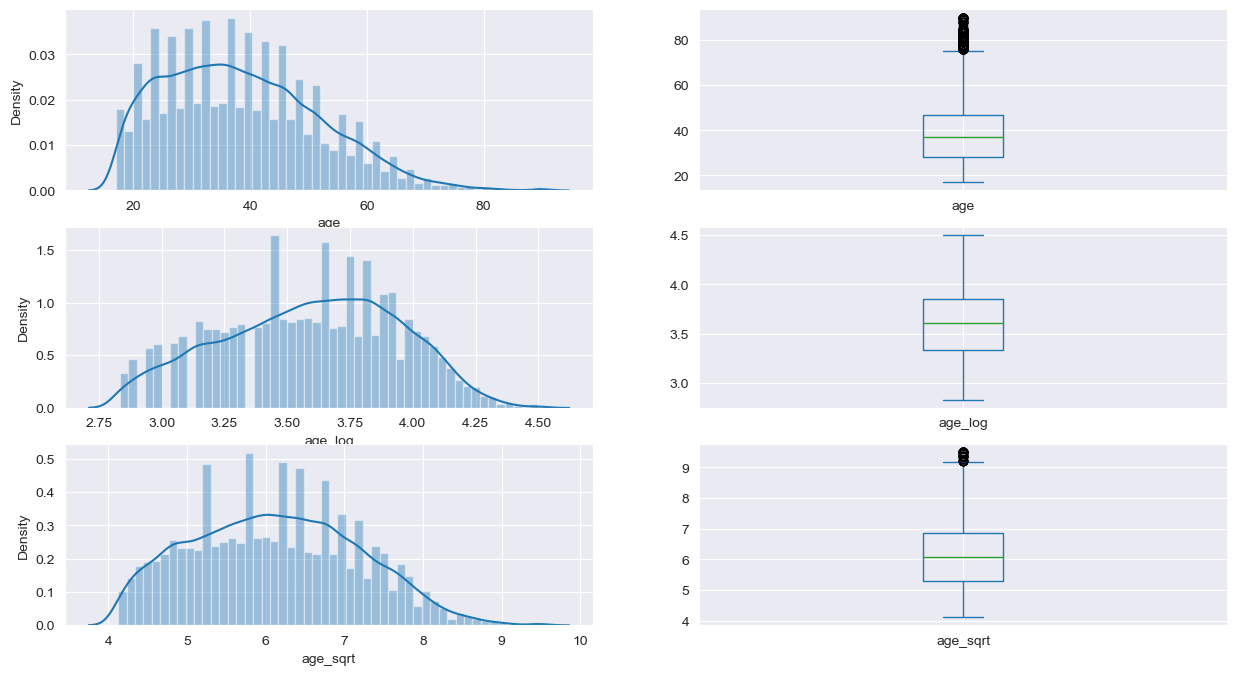

In [67]:
df_age = df.copy()
df_age['age_log'] = np.log(df_age['age'])
df_age['age_sqrt'] = np.sqrt(df_age['age'])

print("The skewness of the original data is {}".format(df_age.age.skew()))
print("The skewness of the log transformed data is {}".format(df_age.age_log.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df_age.age_sqrt.skew()))

print('')

print("The kurtosis of the original data is {}".format(df_age.age.kurt()))
print("The kurtosis of the olog transformed data is {}".format(df_age.age_log.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df_age.age_sqrt.kurt()))

fig, axes = plt.subplots(3, 2, figsize=(15, 8))

sns.distplot(df_age.age, ax=axes[0, 0])
df_age.age.plot.box(ax=axes[0, 1])
sns.distplot(df_age.age_log, ax=axes[1, 0])
df_age.age_log.plot.box(ax=axes[1, 1])
sns.distplot(df_age.age_sqrt, ax=axes[2, 0])
df_age.age_sqrt.plot.box(ax=axes[2, 1])
plt.show()

The skewness of the original data is 0.5328158942555791
The skewness of the log transformed data is -0.15725339208265038
The skewness of the SQRT transformed data is 0.17896737910206892

The kurtosis of the original data is -0.15587445202596273
The kurtosis of the olog transformed data is -0.721072021079967
The kurtosis of the SQRT transformed data is -0.6174947111261546


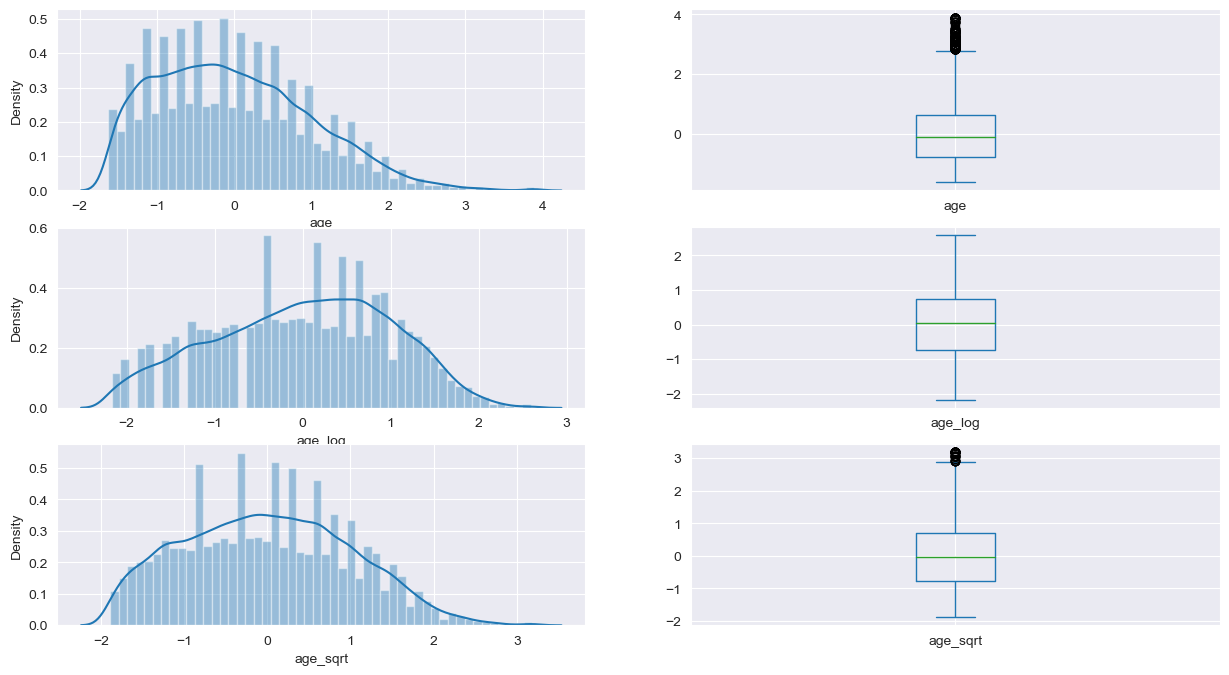

In [68]:
# normalize the data

df_age[['age', 'age_log', 'age_sqrt']] = StandardScaler().fit_transform(df_age[['age', 'age_log', 'age_sqrt']])

print("The skewness of the original data is {}".format(df_age.age.skew()))
print("The skewness of the log transformed data is {}".format(df_age.age_log.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df_age.age_sqrt.skew()))

print('')

print("The kurtosis of the original data is {}".format(df_age.age.kurt()))
print("The kurtosis of the olog transformed data is {}".format(df_age.age_log.kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df_age.age_sqrt.kurt()))

fig, axes = plt.subplots(3, 2, figsize=(15, 8))

sns.distplot(df_age.age, ax=axes[0, 0])
df_age.age.plot.box(ax=axes[0, 1])
sns.distplot(df_age.age_log, ax=axes[1, 0])
df_age.age_log.plot.box(ax=axes[1, 1])
sns.distplot(df_age.age_sqrt, ax=axes[2, 0])
df_age.age_sqrt.plot.box(ax=axes[2, 1])
plt.show()

In [69]:
df_age.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_log,age_sqrt
0,0.034201,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.204110,0.120171
1,0.866417,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0.913095,0.900496
2,-0.041455,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.129989,0.044050
3,1.093385,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,1.079366,1.097962
4,-0.798015,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,-0.741419,-0.780523


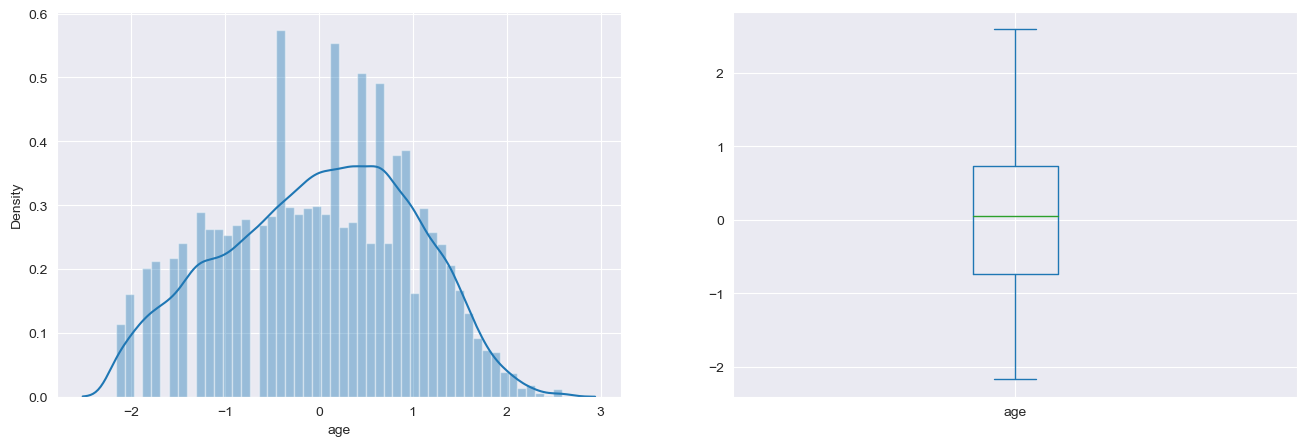

In [70]:
df['age'] = np.log(df['age'])
df[['age']] = StandardScaler().fit_transform(df[['age']])
df.head()

plt.figure()
plt.subplot(121)
sns.distplot(df['age'])

plt.subplot(122)
df['age'].plot.box(figsize=(16, 5))
plt.show()

##### 2.2 education-num

The skewness of the original data is -0.31062094647701904
The kurtosis of the original data is 0.635123582201278


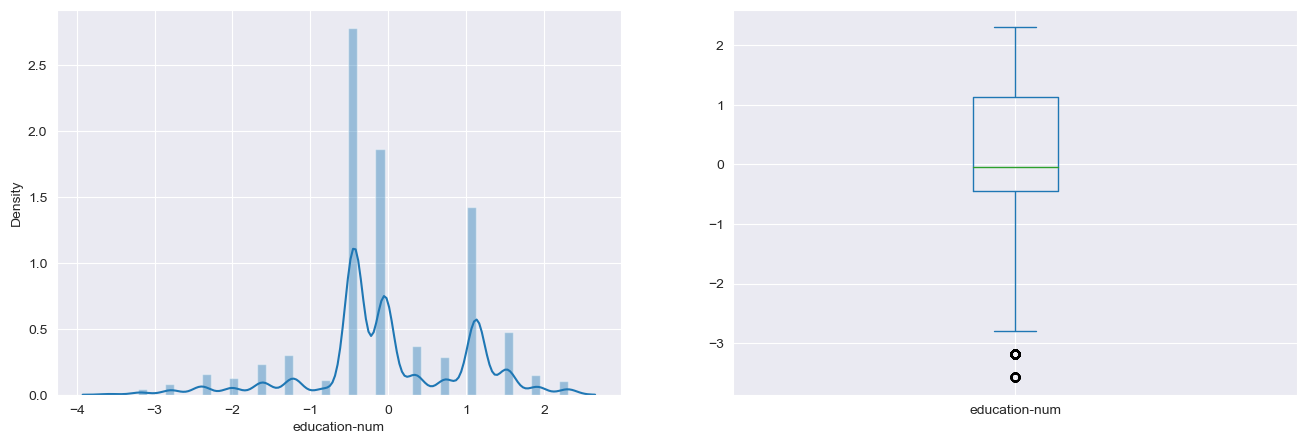

In [77]:
print("The skewness of the original data is {}".format(df['education-num'].skew()))
print("The kurtosis of the original data is {}".format(df['education-num'].kurt()))

plt.figure()
plt.subplot(121)
sns.distplot(df['education-num'])

plt.subplot(122)
df['education-num'].plot.box(figsize=(16, 5))
plt.show()

##### 2.3 capital-gain

The skewness of the original data is 11.789002180291192
The kurtosis of the original data is 150.15129227909196


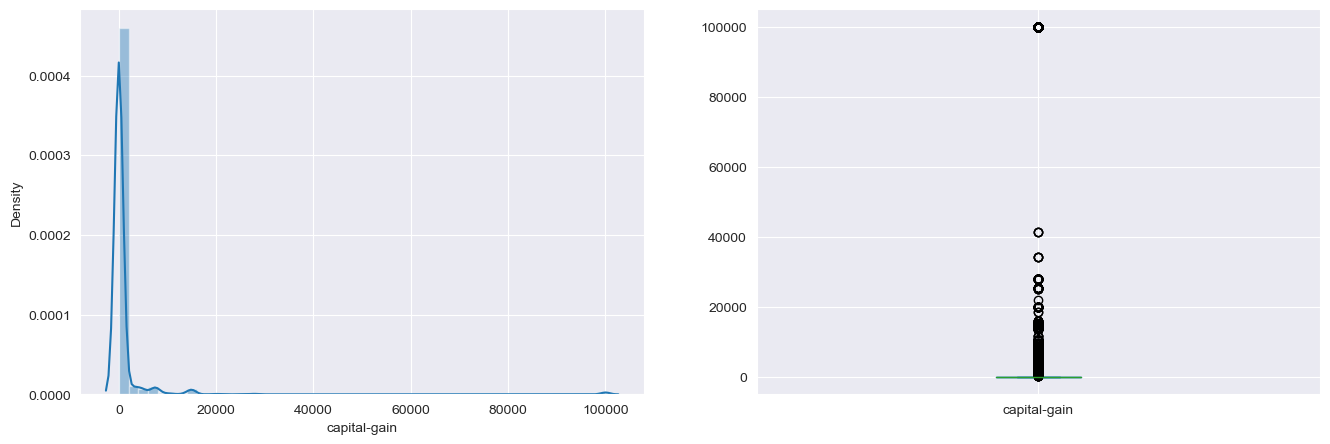

In [78]:
print("The skewness of the original data is {}".format(df['capital-gain'].skew()))
print("The kurtosis of the original data is {}".format(df['capital-gain'].kurt()))

plt.figure()
plt.subplot(121)
sns.distplot(df['capital-gain'])

plt.subplot(122)
df['capital-gain'].plot.box(figsize=(16, 5))
plt.show()

In [86]:
df_caption_gain = df.copy()
df_caption_gain['capital-gain'] = LabelEncoder().fit_transform(df_caption_gain['capital-gain'])
df_caption_gain

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.204110,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,26,0.0,40.0,United-States,<=50K
1,0.913095,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,0.129989,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,1.079366,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,-0.741419,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.272580,Private,Bachelors,1.128753,Never-married,Prof-specialty,Own-child,White,Male,0,0.0,40.0,United-States,<=50K
45218,0.204110,Private,Bachelors,1.128753,Divorced,Prof-specialty,Not-in-family,White,Female,0,0.0,36.0,United-States,<=50K
45219,0.129989,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0.0,50.0,United-States,<=50K
45220,0.548322,Private,Bachelors,1.128753,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,81,0.0,40.0,United-States,<=50K


In [97]:
df_caption_gain = df.copy()
df_caption_gain.loc[df_caption_gain['capital-gain'] == 0, 'capital-gain'] = 0
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 0) & (df_caption_gain['capital-gain'] <= 1000), 'capital-gain'] = 1
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 1000) & (df_caption_gain['capital-gain'] <= 2000), 'capital-gain'] = 2
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 2000) & (df_caption_gain['capital-gain'] <= 2500), 'capital-gain'] = 3
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 2500) & (df_caption_gain['capital-gain'] <= 3000), 'capital-gain'] = 4
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 3000) & (df_caption_gain['capital-gain'] <= 3500), 'capital-gain'] = 5
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 3500) & (df_caption_gain['capital-gain'] <= 4500), 'capital-gain'] = 8
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 4500) & (df_caption_gain['capital-gain'] <= 5000), 'capital-gain'] = 9
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 5000) & (df_caption_gain['capital-gain'] <= 6000), 'capital-gain'] = 10
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 6000) & (df_caption_gain['capital-gain'] <= 7000), 'capital-gain'] = 11
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 7000) & (df_caption_gain['capital-gain'] <= 8000), 'capital-gain'] = 12
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 8000) & (df_caption_gain['capital-gain'] <= 9000), 'capital-gain'] = 13
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 9000) & (df_caption_gain['capital-gain'] <= 10000), 'capital-gain'] = 14
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 10000) & (df_caption_gain['capital-gain'] <= 14000), 'capital-gain'] = 15
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 14000) & (df_caption_gain['capital-gain'] <= 15000), 'capital-gain'] = 16
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 15000) & (df_caption_gain['capital-gain'] <= 16000), 'capital-gain'] = 17
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 16000) & (df_caption_gain['capital-gain'] <= 20000), 'capital-gain'] = 18
df_caption_gain.loc[(df_caption_gain['capital-gain'] > 20000) & (df_caption_gain['capital-gain'] < 99999), 'capital-gain'] = 19
df_caption_gain.loc[df_caption_gain['capital-gain'] == 99999, 'capital-gain'] = 20

df_caption_gain

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.204110,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,3.0,0.0,40.0,United-States,<=50K
1,0.913095,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,0.129989,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,1.079366,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,-0.741419,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.272580,Private,Bachelors,1.128753,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,0.204110,Private,Bachelors,1.128753,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,0.129989,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,0.548322,Private,Bachelors,1.128753,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,10.0,0.0,40.0,United-States,<=50K


##### 2.4 capital-loss

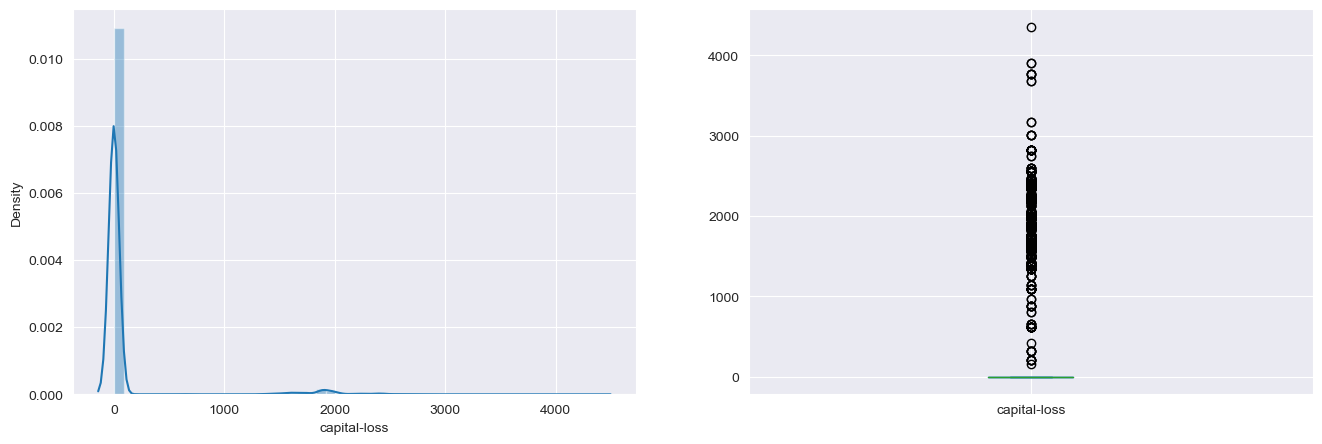

In [22]:
plt.figure()
plt.subplot(121)
sns.distplot(df['capital-loss'])

plt.subplot(122)
df['capital-loss'].plot.box(figsize=(16, 5))
plt.show()

In [99]:
df_caption_loss = df.copy()
df_caption_loss['capital-loss'] = LabelEncoder().fit_transform(df_caption_loss['capital-loss'])
df_caption_loss

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.204110,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40.0,United-States,<=50K
1,0.913095,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13.0,United-States,<=50K
2,0.129989,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40.0,United-States,<=50K
3,1.079366,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40.0,United-States,<=50K
4,-0.741419,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.272580,Private,Bachelors,1.128753,Never-married,Prof-specialty,Own-child,White,Male,0.0,0,40.0,United-States,<=50K
45218,0.204110,Private,Bachelors,1.128753,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0,36.0,United-States,<=50K
45219,0.129989,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0,50.0,United-States,<=50K
45220,0.548322,Private,Bachelors,1.128753,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0,40.0,United-States,<=50K


In [100]:
df_caption_loss = df.copy()
df_caption_loss.loc[df_caption_loss['capital-loss'] == 0, 'capital-loss'] = 0
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 0) & (df_caption_loss['capital-loss'] <= 500), 'capital-loss'] = 1
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 500) & (df_caption_loss['capital-loss'] <= 1000), 'capital-loss'] = 2
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 1000) & (df_caption_loss['capital-loss'] <= 1500), 'capital-loss'] = 3
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 1500) & (df_caption_loss['capital-loss'] <= 1800), 'capital-loss'] = 4
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 1800) & (df_caption_loss['capital-loss'] <= 2000), 'capital-loss'] = 5
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 2000) & (df_caption_loss['capital-loss'] <= 2500), 'capital-loss'] = 6
df_caption_loss.loc[(df_caption_loss['capital-loss'] > 2500), 'capital-loss'] = 7

df_caption_loss

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.204110,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,0.913095,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,0.129989,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,1.079366,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,-0.741419,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.272580,Private,Bachelors,1.128753,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,0.204110,Private,Bachelors,1.128753,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,0.129989,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,0.548322,Private,Bachelors,1.128753,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


##### 2.5 hours-per-week

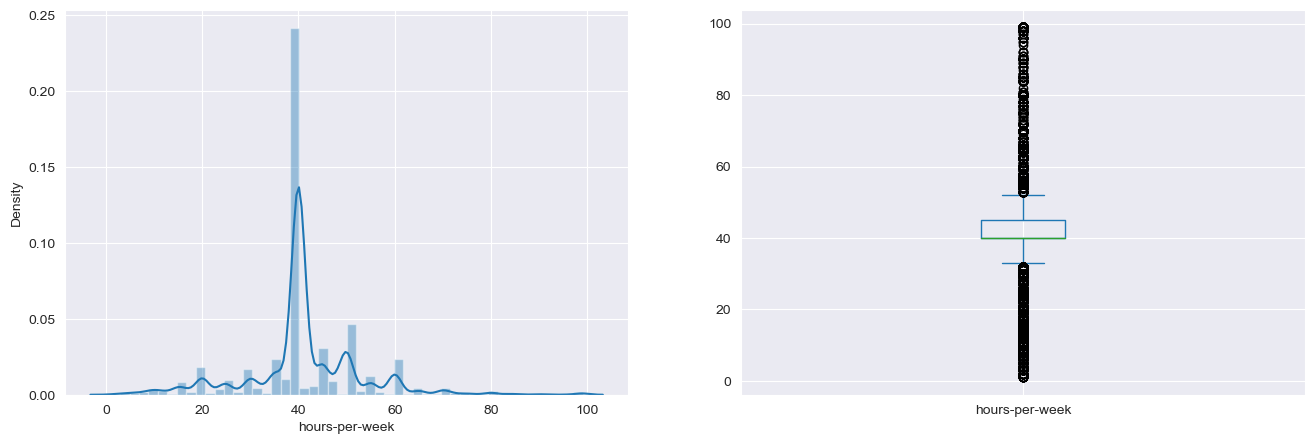

In [23]:
plt.figure()
plt.subplot(121)
sns.distplot(df['hours-per-week'])

plt.subplot(122)
df['hours-per-week'].plot.box(figsize=(16, 5))
plt.show()

The skewness of the original data is 0.34054514378520867
The skewness of the log transformed data is -2.4454556423080542
The skewness of the SQRT transformed data is -0.8552931699997514

The kurtosis of the original data is 3.201424896002209
The kurtosis of the olog transformed data is 11.427949993312497
The kurtosis of the SQRT transformed data is 3.521085686998871


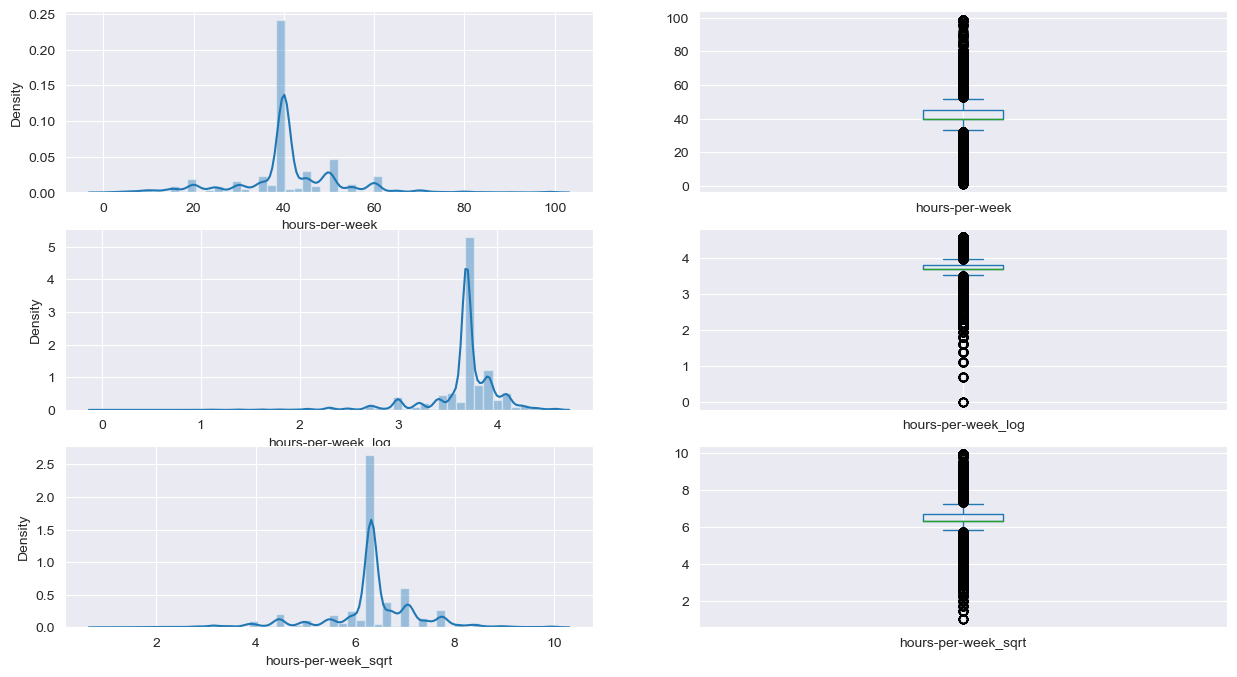

In [104]:
df_hours_per_week = df.copy()
df_hours_per_week['hours-per-week_log'] = np.log(df_hours_per_week['hours-per-week'])
df_hours_per_week['hours-per-week_sqrt'] = np.sqrt(df_hours_per_week['hours-per-week'])

print("The skewness of the original data is {}".format(df_hours_per_week['hours-per-week'].skew()))
print("The skewness of the log transformed data is {}".format(df_hours_per_week['hours-per-week_log'].skew()))
print('The skewness of the SQRT transformed data is {}'.format(df_hours_per_week['hours-per-week_sqrt'].skew()))

print('')

print("The kurtosis of the original data is {}".format(df_hours_per_week['hours-per-week'].kurt()))
print("The kurtosis of the olog transformed data is {}".format(df_hours_per_week['hours-per-week_log'].kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(df_hours_per_week['hours-per-week_sqrt'].kurt()))

fig, axes = plt.subplots(3, 2, figsize=(15, 8))

sns.distplot(df_hours_per_week['hours-per-week'], ax=axes[0, 0])
df_hours_per_week['hours-per-week'].plot.box(ax=axes[0, 1])
sns.distplot(df_hours_per_week['hours-per-week_log'], ax=axes[1, 0])
df_hours_per_week['hours-per-week_log'].plot.box(ax=axes[1, 1])
sns.distplot(df_hours_per_week['hours-per-week_sqrt'], ax=axes[2, 0])
df_hours_per_week['hours-per-week_sqrt'].plot.box(ax=axes[2, 1])
plt.show()

The skewness of the original data is 0.34054514378520834
The kurtosis of the original data is 3.2014248960022083


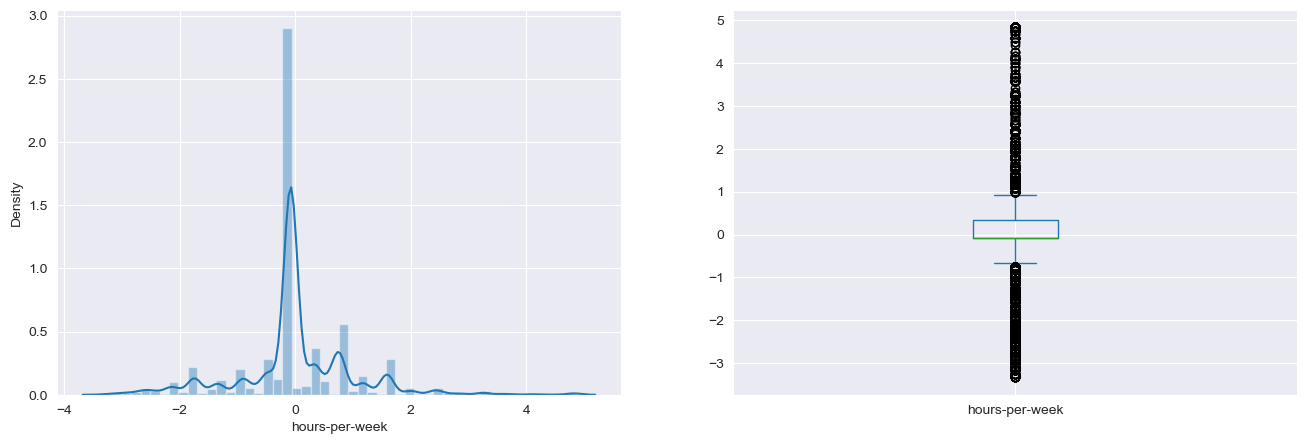

In [106]:
df_hours_per_week = df.copy()
df_hours_per_week['hours-per-week'] = StandardScaler().fit_transform(df_hours_per_week[['hours-per-week']])

print("The skewness of the original data is {}".format(df_hours_per_week['hours-per-week'].skew()))
print("The kurtosis of the original data is {}".format(df_hours_per_week['hours-per-week'].kurt()))

plt.figure()
plt.subplot(121)
sns.distplot(df_hours_per_week['hours-per-week'])

plt.subplot(122)
df_hours_per_week['hours-per-week'].plot.box(figsize=(16, 5))
plt.show()

#### 数据类型转换与空值处理

In [4]:
df.age = df.age.astype('float64')
df.dtypes

age                float64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [5]:
df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Outliers Treatment

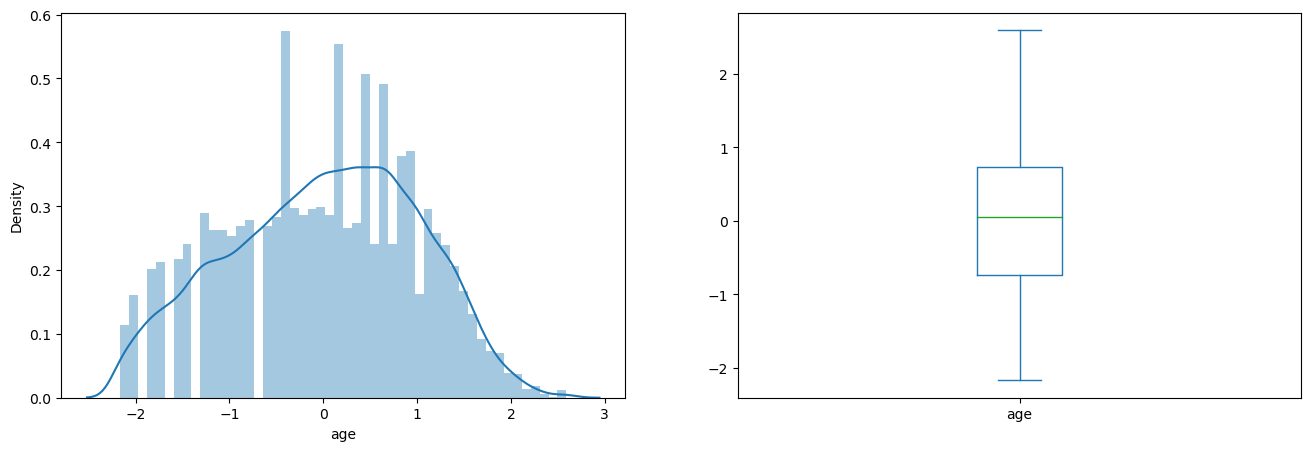

In [6]:
df['age'] = np.log(df['age'])
df[['age']] = StandardScaler().fit_transform(df[['age']])
df.head()

plt.figure()
plt.subplot(121)
sns.distplot(df['age'])

plt.subplot(122)
df['age'].plot.box(figsize=(16, 5))
plt.show()

In [7]:
df[['education-num']] = StandardScaler().fit_transform(df[['education-num']])

In [8]:
df['capital-gain'].loc[df['capital-gain'] == 0] = 0
df['capital-gain'].loc[(df['capital-gain'] > 0) & (df['capital-gain'] <= 1000)] = 1
df['capital-gain'].loc[(df['capital-gain'] > 1000) & (df['capital-gain'] <= 2000)] = 2
df['capital-gain'].loc[(df['capital-gain'] > 2000) & (df['capital-gain'] <= 2500)] = 3
df['capital-gain'].loc[(df['capital-gain'] > 2500) & (df['capital-gain'] <= 3000)] = 4
df['capital-gain'].loc[(df['capital-gain'] > 3000) & (df['capital-gain'] <= 3500)] = 5
df['capital-gain'].loc[(df['capital-gain'] > 3500) & (df['capital-gain'] <= 4000)] = 6
df['capital-gain'].loc[(df['capital-gain'] > 4000) & (df['capital-gain'] <= 4500)] = 7
df['capital-gain'].loc[(df['capital-gain'] > 4500) & (df['capital-gain'] <= 5000)] = 8
df['capital-gain'].loc[(df['capital-gain'] > 5000) & (df['capital-gain'] <= 6000)] = 9
df['capital-gain'].loc[(df['capital-gain'] > 6000) & (df['capital-gain'] <= 7000)] = 10
df['capital-gain'].loc[(df['capital-gain'] > 7000) & (df['capital-gain'] <= 8000)] = 11
df['capital-gain'].loc[(df['capital-gain'] > 8000) & (df['capital-gain'] <= 9000)] = 12
df['capital-gain'].loc[(df['capital-gain'] > 9000) & (df['capital-gain'] <= 10000)] = 13
df['capital-gain'].loc[(df['capital-gain'] > 10000) & (df['capital-gain'] <= 14000)] = 14
df['capital-gain'].loc[(df['capital-gain'] > 14000) & (df['capital-gain'] <= 15000)] = 15
df['capital-gain'].loc[(df['capital-gain'] > 15000) & (df['capital-gain'] <= 16000)] = 16
df['capital-gain'].loc[(df['capital-gain'] > 16000) & (df['capital-gain'] <= 20000)] = 17
df['capital-gain'].loc[(df['capital-gain'] > 20000) & (df['capital-gain'] < 99999)] = 18
df['capital-gain'].loc[df['capital-gain'] == 99999] = 19

In [9]:
df['capital-loss'].loc[df['capital-loss'] == 0] = 0
df['capital-loss'].loc[(df['capital-loss'] > 0) & (df['capital-loss'] <= 500)] = 1
df['capital-loss'].loc[(df['capital-loss'] > 500) & (df['capital-loss'] <= 1000)] = 2
df['capital-loss'].loc[(df['capital-loss'] > 1000) & (df['capital-loss'] <= 1500)] = 3
df['capital-loss'].loc[(df['capital-loss'] > 1500) & (df['capital-loss'] <= 1800)] = 4
df['capital-loss'].loc[(df['capital-loss'] > 1800) & (df['capital-loss'] <= 2000)] = 5
df['capital-loss'].loc[(df['capital-loss'] > 2000) & (df['capital-loss'] <= 2500)] = 6
df['capital-loss'].loc[(df['capital-loss'] > 2500)] = 7

In [10]:
df['hours-per-week'] = StandardScaler().fit_transform(df[['hours-per-week']])

#### 数据转换：字典类型数据处理

使用 one-hot encoding 处理

In [11]:
df.describe(exclude=[np.number])

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


In [12]:
# Data Transformation

# Perform one-hot encoding on the data

df = pd.get_dummies(df, columns=['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)



In [13]:
df['income'] = LabelEncoder().fit_transform(df['income'])


In [14]:
df.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.204110,1.128753,3.0,0.0,-0.078120,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.913095,1.128753,0.0,0.0,-2.326738,0,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.129989,-0.438122,0.0,0.0,-0.078120,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.079366,-1.221559,0.0,0.0,-0.078120,0,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.741419,1.128753,0.0,0.0,-0.078120,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Exercise 3 Shuffle and Split Data

In [15]:
# Split the 'feature' and 'income' data into training and testing sets

Y = df['income']
X = df.drop('income', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (36177, 95)
The shape of X_test is: (9045, 95)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4: A Simple Model

What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [16]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

accuracy = y_test[y_test == 1].shape[0] / y_test.shape[0]

tn, fp, fn, tp = confusion_matrix(y_test, np.ones_like(y_test)).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print('accuracy = ', accuracy)
print('f_score = ', f1_score)

print('f_score = ', 2 * (accuracy * 1) / (accuracy + 1))

accuracy =  0.24378109452736318
f_score =  0.392
f_score =  0.392


### Exercise 5 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

#### 5.1 Gaussian Naive Bayes (GaussianNB)

accuracy =  0.5921503593145384


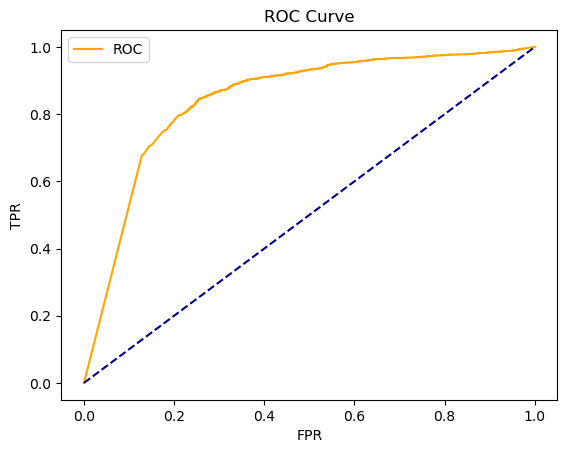

In [17]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy = ', accuracy_score(y_pred, y_test))

y_pred = model.predict_proba(X_test)

fper, tper, thresholds = roc_curve(y_test, y_pred[:, 1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 5.2 Decision Tree Classifier

accuracy =  0.8100608070757325


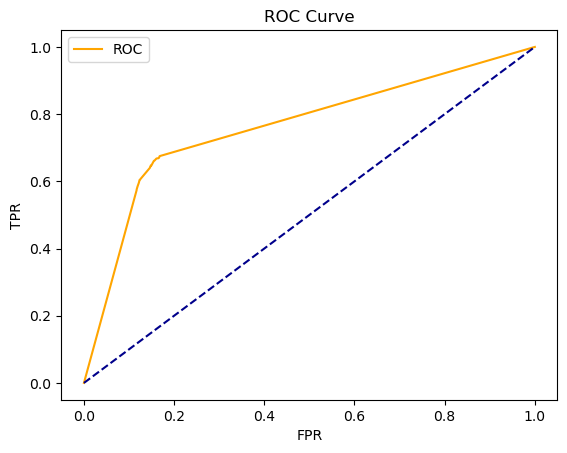

In [32]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy = ', accuracy_score(y_pred, y_test))

y_pred = model.predict_proba(X_test)

fper, tper, thresholds = roc_curve(y_test, y_pred[:, 1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 5.3 Random Forest Classifier

accuracy =  0.8389165284687673


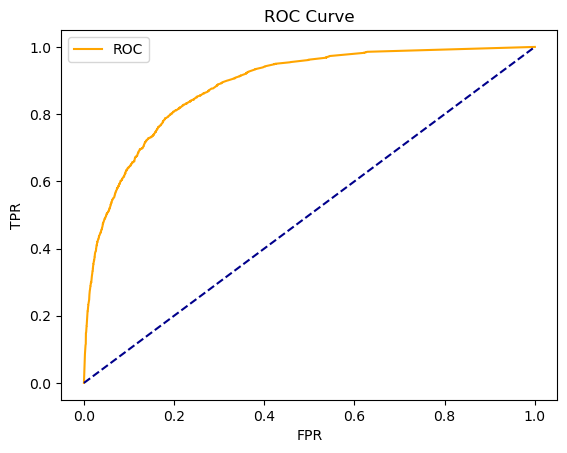

In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy = ', accuracy_score(y_pred, y_test))

y_pred = model.predict_proba(X_test)

fper, tper, thresholds = roc_curve(y_test, y_pred[:, 1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 5.4 K-Nearest Neighbors

需要将 knn.predict(X_test) 更改为 knn.predict(X_test.values)

[Github issue](https://github.com/scikit-learn/scikit-learn/issues/26768)

GaussianNB accuracy =  0.8486456605859591


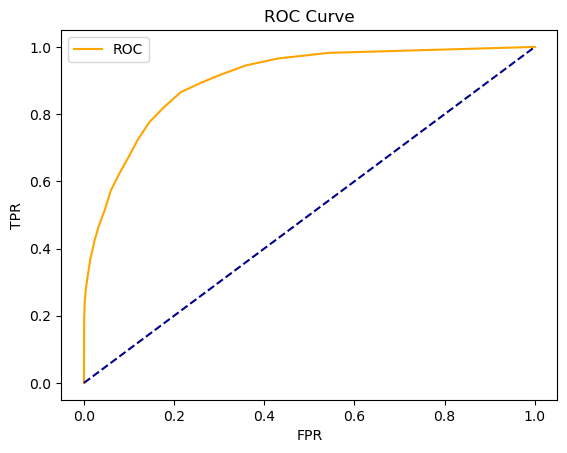

In [28]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test.values)

print('GaussianNB accuracy = ', accuracy_score(y_pred, y_test))

y_pred = model.predict_proba(X_test.values)

fper, tper, thresholds = roc_curve(y_test, y_pred[:, 1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### 5.5 Support Vector Machines

In [35]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy = ', accuracy_score(y_pred, y_test))

# y_pred = model.predict_proba(X_test)
# 
# fper, tper, thresholds = roc_curve(y_test, y_pred[:, 1])
# plt.plot(fper, tper, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

accuracy =  0.8487562189054726


#### 5.6 Logistic Regression

accuracy =  0.8486456605859591


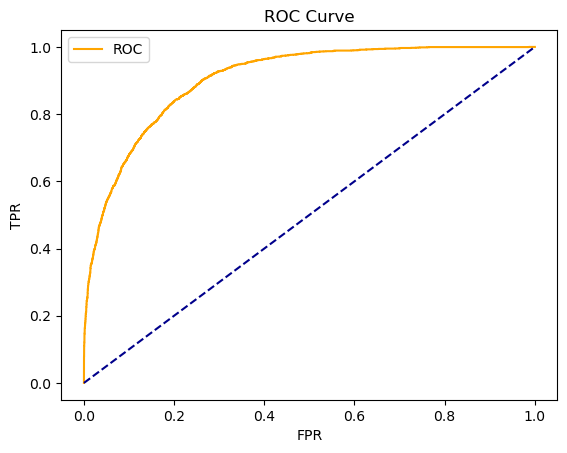

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('accuracy = ', accuracy_score(y_pred, y_test))

y_pred = model.predict_proba(X_test)

fper, tper, thresholds = roc_curve(y_test, y_pred[:, 1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Question:

#### Q1:

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provides the most predictive power. Choose a scikit-learn classifier (e.g adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. List two supervised learning models that apply to this problem, and you will test them on census data and plot the following graph.



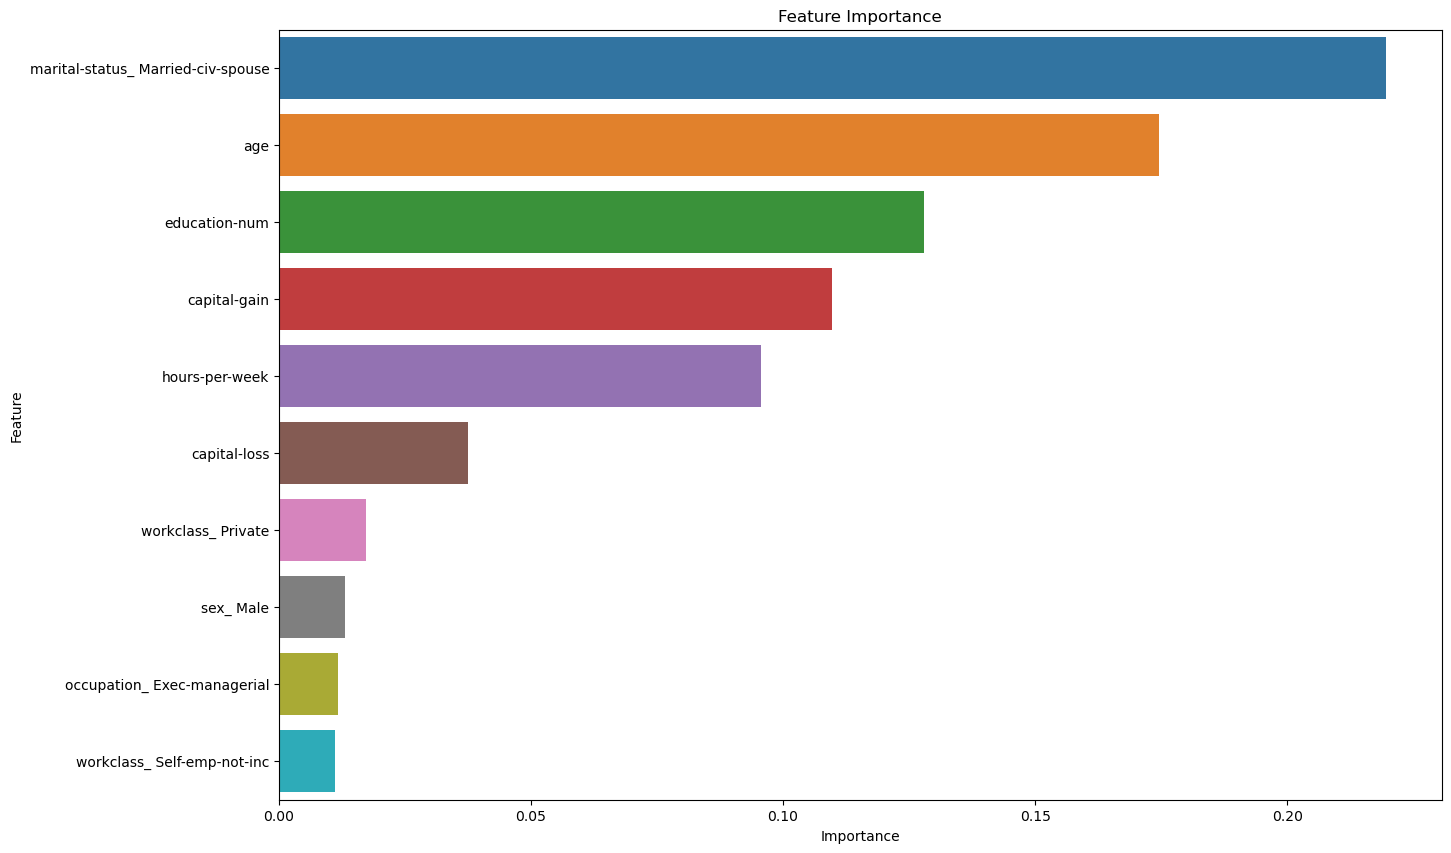

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

feature = pd.DataFrame({'Feature':X.columns.values, 'Importance': model.feature_importances_})
feature.sort_values(by='Importance', ascending=False, inplace=True)
feature

plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature[0:10])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Married civ spouse: 已婚公民配偶

                                       Feature    Importance
0                                          age  2.405485e-01
4                               hours-per-week  1.189223e-01
2                                 capital-gain  1.050243e-01
27          marital-status_ Married-civ-spouse  8.783689e-02
1                                education-num  7.352025e-02
..                                         ...           ...
66                   native-country_ Guatemala  8.304593e-05
23                  education_level_ Preschool  5.140134e-05
81  native-country_ Outlying-US(Guam-USVI-etc)  2.906028e-05
69                    native-country_ Honduras  2.626152e-05
68          native-country_ Holand-Netherlands  7.249896e-08

[95 rows x 2 columns]


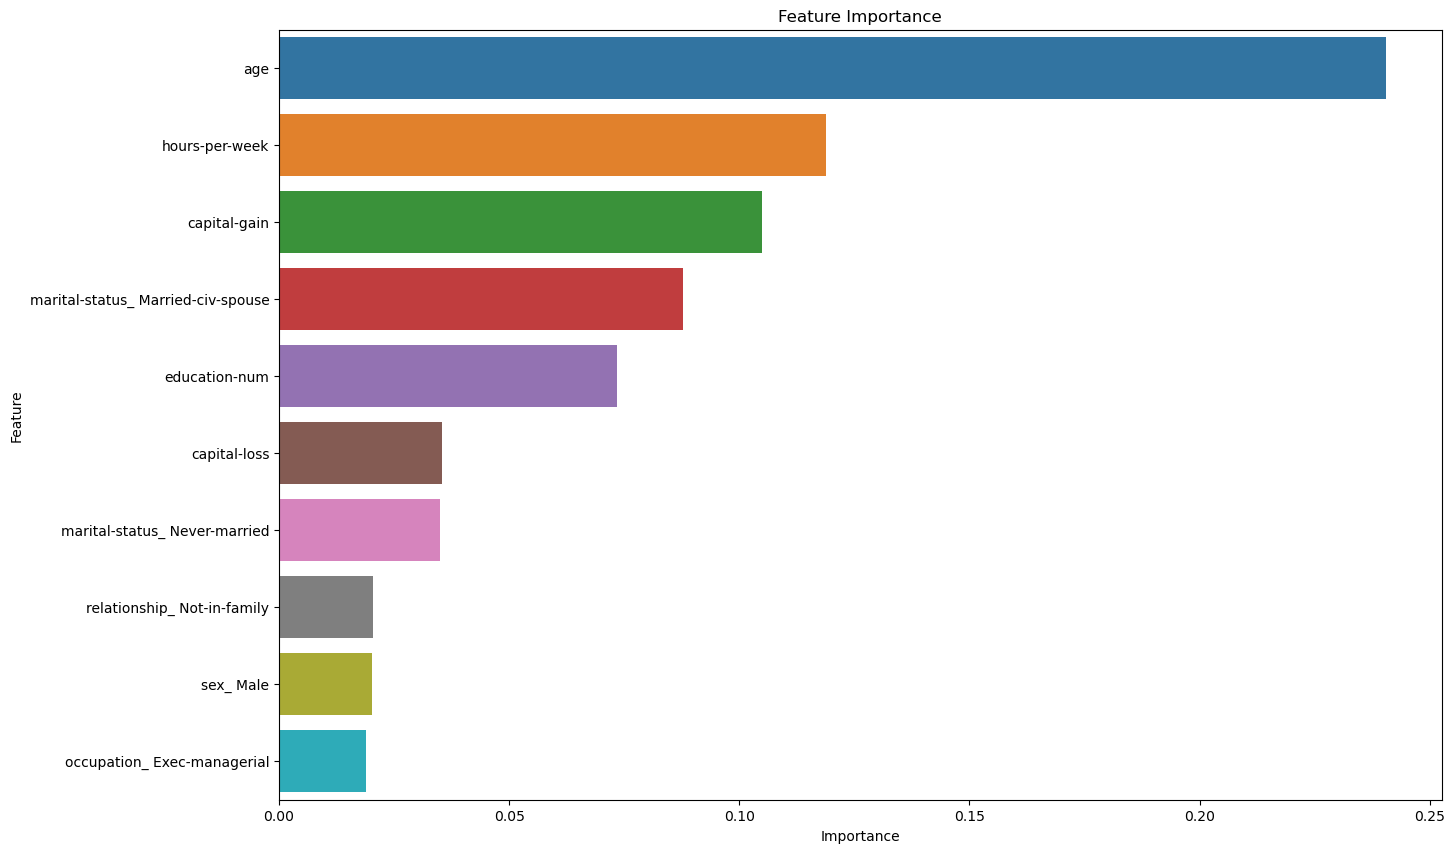

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature = pd.DataFrame({'Feature':X.columns.values, 'Importance': model.feature_importances_})
feature.sort_values(by='Importance', ascending=False, inplace=True)
print(feature)

# draw barplot
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature[0:10])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [27]:
sum(feature.Importance)

1.0

来源：chatGPT

上面尝试的机器学习分类算法的简要介绍：

1. **Gaussian Naive Bayes (GaussianNB)**:
   - 基于贝叶斯定理，假设特征之间是独立的，适用于特征是连续值的情况。
   - 适用于小规模数据集，计算速度快，简单易懂。

2. **Decision Tree Classifier**:
   - 基于特征的值进行分类，每个节点代表一个特征，每个分支代表该特征的一个值，叶节点代表类标签。
   - 可以处理连续和离散特征，易解释，但容易过拟合。

3. **Random Forest Classifier**:
   - 由多个决策树组成，通过投票或平均预测结果来进行分类。
   - 具有较高的准确性和泛化能力，不易过拟合，适用于大规模数据集。

4. **K-Nearest Neighbors (KNN)**:
   - 基于样本的特征与其最近邻居的类别进行分类，常用欧几里得距离进行度量。
   - 简单易理解，但对异常值敏感，需要事先确定 k 的值。

5. **Support Vector Machine (SVM)**:
   - 在特征空间中构建一个超平面，用于最大化类别间的间隔，可以进行非线性分类。
   - 适用于高维空间，可以使用不同的核函数，但参数调优较为关键。

6. **Logistic Regression**:
   - 用于二分类问题，通过 logistic 函数将线性回归的输出映射到 (0, 1) 之间。
   - 参数易解释，速度快，适用于二分类问题。


#### Q2

Describe one real-world application in industry where a model can be applied

暑假实习的时候，我进行急救天眼app的开发，这个app可以收集用户的一些信息，如过往病史、年龄等信息，如果进一步跟具有检测功能设备的厂商合作，将可以获得心率、睡眠、血压等数据。希望能够通过这些数据预测一个用户是否为心脏骤停高发群体。

#### Q3、Q4

What are the strengths of the model; when does it perform well?

What are the weaknesses of the model; when does it perform poorly?

KNN, SVM, Logistic回归预测准确度均为 0.84, 效果比较好

朴素贝叶斯效果最差, 原因显而易见, 在对原始数据进行 one-hot encoding 后, 各个变量之间并非独立而是具有依赖关系的

附:
下面是常见分类算法的优点和缺点：

答案来源：chatGPT

1. **Gaussian Naive Bayes (GaussianNB)**:
   - 优点：
     - 计算简单，速度快。
     - 适用于大规模数据集和高维特征。
   - 缺点：
     - 假设特征之间相互独立，这在实际数据中往往不成立。

2. **Decision Tree Classifier**:
   - 优点：
     - 易于理解和解释，类似人类决策过程。
     - 能够处理连续和离散特征。
   - 缺点：
     - 容易过拟合，特别是在复杂模型或没有剪枝的情况下。
     - 对数据中小的变化敏感。

3. **Random Forest Classifier**:
   - 优点：
     - 具有较高的准确性和泛化能力。
     - 对过拟合有一定的抵抗能力。
   - 缺点：
     - 可能会变得很大和复杂，不易解释。

4. **K-Nearest Neighbors (KNN)**:
   - 优点：
     - 简单，易于实现。
     - 适用于多类别分类和回归问题。
   - 缺点：
     - 对异常值敏感。
     - 需要事先确定 k 的值。

5. **Support Vector Machine (SVM)**:
   - 优点：
     - 适用于高维空间。
     - 可以使用不同的核函数处理线性和非线性问题。
   - 缺点：
     - 对参数调优和核函数的选择敏感。
     - 训练时间较长，不适用于大规模数据集。

6. **Logistic Regression**:
   - 优点：
     - 计算速度快，适用于大规模数据集。
     - 输出结果具有概率意义，可用于二分类问题。
   - 缺点：
     - 只适用于二分类问题。
     - 对特征空间的线性分割能力有限。

选择合适的算法取决于问题的性质、数据集的规模、特征的属性等多方面因素。通常需要根据实际情况进行实验和比较，以选择最适合特定问题的分类器。

#### Q5

What makes this model a good candidate for the problem, given what you know about the data?

1. 根据Q1的研究, 数据中 age, hours-per-week, capital-gain, education-num 是影响比较大的因素. 这些因素都是数字类型的变量, 而不是字典类型的变量. 因此, 合理地怀疑对于全部字典变量使用 one-hot 编码是不是不太合理
2. education-num 和 education-level 基本具有一一对应的关系
3. 根据人眼归纳数据, age, hours-per-week, capital-gain, education-num 是影响比较大的因素.
   + 18 岁及一下没有 >50K 的, 19~20 一共仨, 但是27-60的人有比较大的比例收入高, 这说明壮年对于收入有所影响
   + capital-gain 较大的人群更容易收入高
   + 每周工作时间特别少的, 很难赚大钱
   + 学历越高越容易赚钱



观察 Age 的影响:

   age  income_ratio
0   17          0.00
1   18          0.00
2   19          0.00
3   20          0.00
4   21          0.01


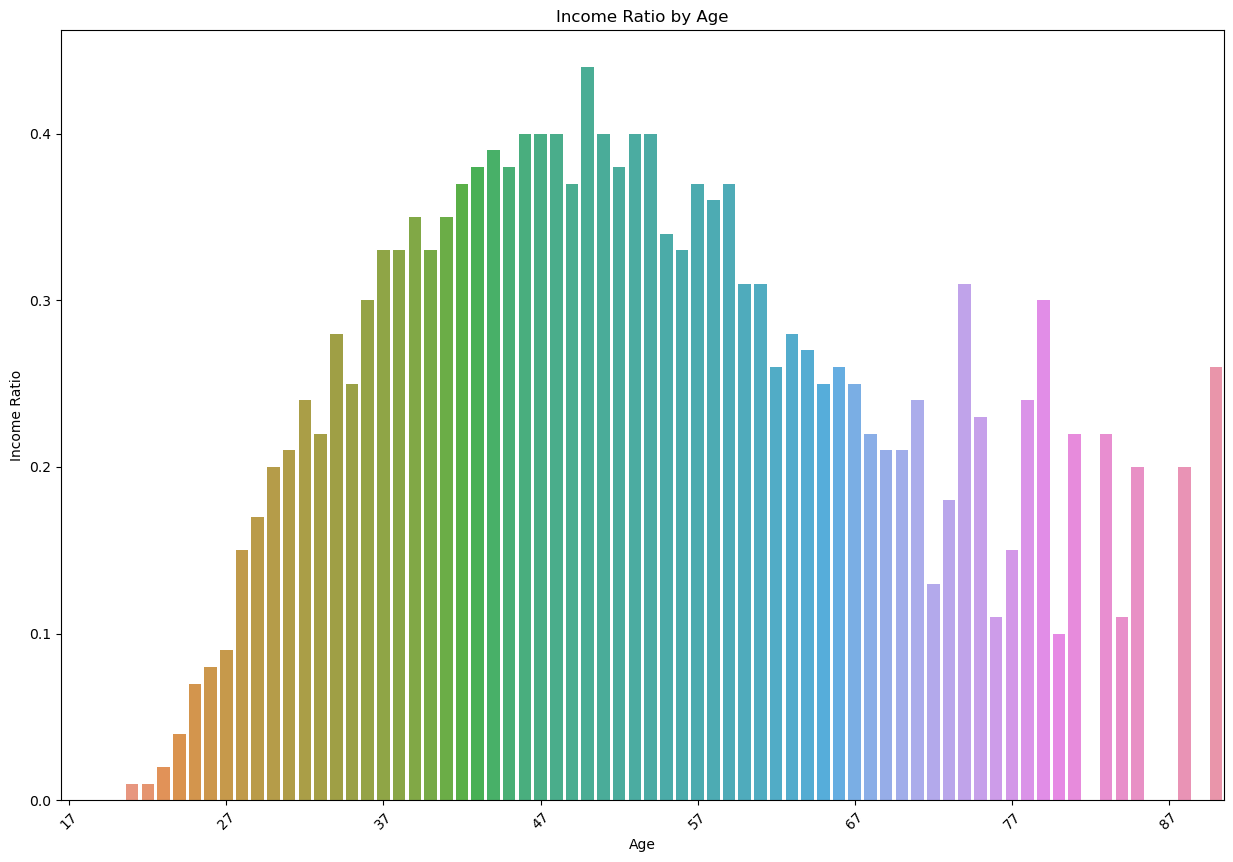

In [27]:
income_ratio_by_age = original_df[original_df['income'] == '>50K'].groupby('age').size() / original_df.groupby('age').size()
income_ratio_by_age = income_ratio_by_age.reset_index(name='income_ratio', inplace=False)
income_ratio_by_age['income_ratio'] = income_ratio_by_age['income_ratio'].fillna(0)
income_ratio_by_age['income_ratio'] = income_ratio_by_age['income_ratio'].apply(lambda x: round(x, 2))
print(income_ratio_by_age.head())
income_ratio_by_age.to_csv('age-percent', index=False)

# barplot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='age', y='income_ratio', data=income_ratio_by_age)
plt.title('Income Ratio by Age')
plt.xlabel('Age')
plt.ylabel('Income Ratio')

# 设置横坐标每隔10个值显示一次
xticks_values = range(0, len(income_ratio_by_age['age']), 10)
xticks_labels = [income_ratio_by_age['age'].iloc[i] for i in xticks_values]
ax.set_xticks(xticks_values)
ax.set_xticklabels(xticks_labels, rotation=45)  

plt.show()


观察 capital-gain 的影响 

   capital-gain  income_ratio
0           0.0          0.21
1         114.0          0.00
2         401.0          0.00
3         594.0          0.00
4         914.0          0.00


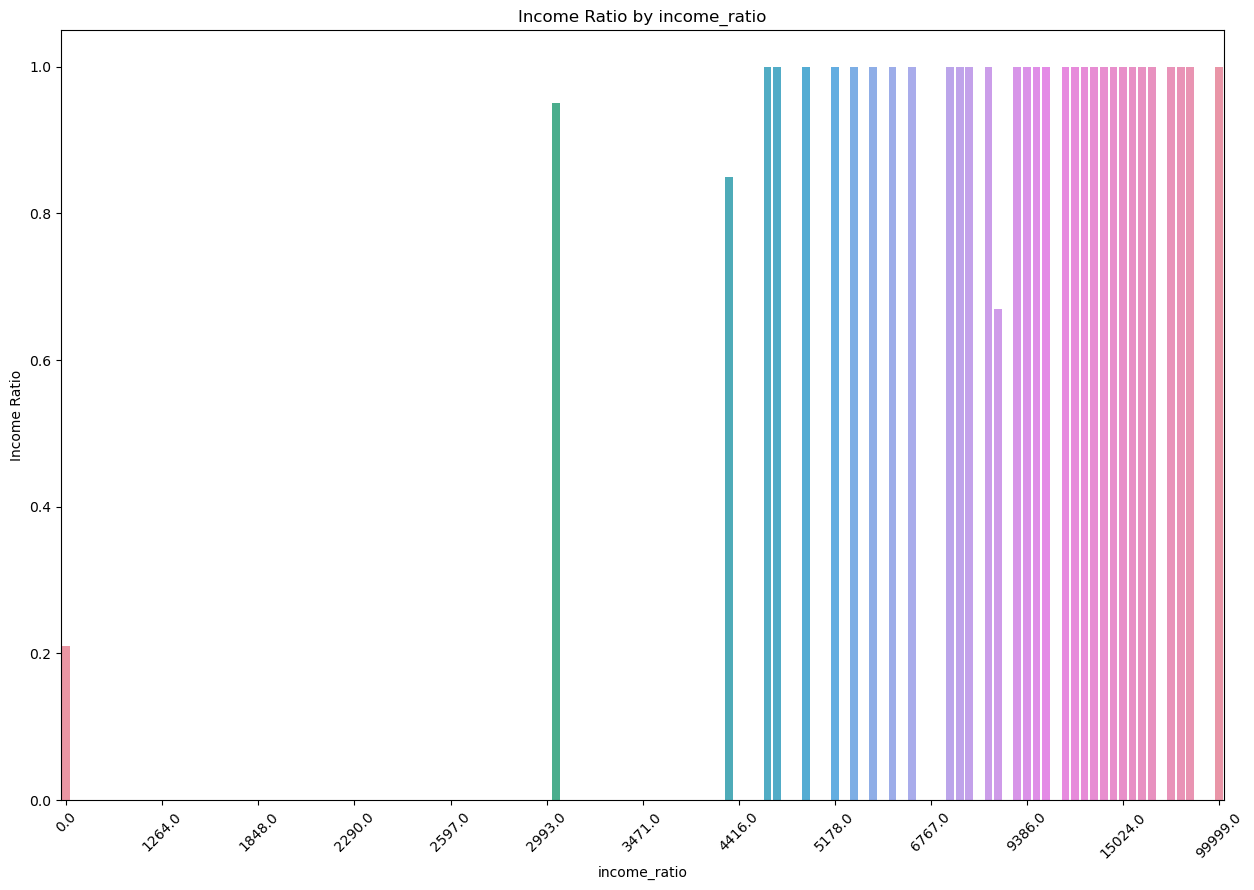

In [26]:
income_ratio_by_capital_gain = original_df[original_df['income'] == '>50K'].groupby('capital-gain').size() / original_df.groupby('capital-gain').size()
income_ratio_by_capital_gain = income_ratio_by_capital_gain.reset_index(name='income_ratio', inplace=False)
income_ratio_by_capital_gain['income_ratio'] = income_ratio_by_capital_gain['income_ratio'].fillna(0)
income_ratio_by_capital_gain['income_ratio'] = income_ratio_by_capital_gain['income_ratio'].apply(lambda x: round(x, 2))
print(income_ratio_by_capital_gain.head())
income_ratio_by_capital_gain.to_csv('capital gain-percent', index=False)

# barplot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='capital-gain', y='income_ratio', data=income_ratio_by_capital_gain)
plt.title('Income Ratio by income_ratio')
plt.xlabel('income_ratio')
plt.ylabel('Income Ratio')

# 设置横坐标每隔10个值显示一次
xticks_values = range(0, len(income_ratio_by_capital_gain['capital-gain']), 10)
xticks_labels = [income_ratio_by_capital_gain['capital-gain'].iloc[i] for i in xticks_values]
ax.set_xticks(xticks_values)
ax.set_xticklabels(xticks_labels, rotation=45)  

plt.show()

似乎capital gain 比较高的人income也会 >50K

观察 hours-per-week 的影响

   hours-per-week  income_ratio
0             1.0          0.17
1             2.0          0.12
2             3.0          0.06
3             4.0          0.11
4             5.0          0.13


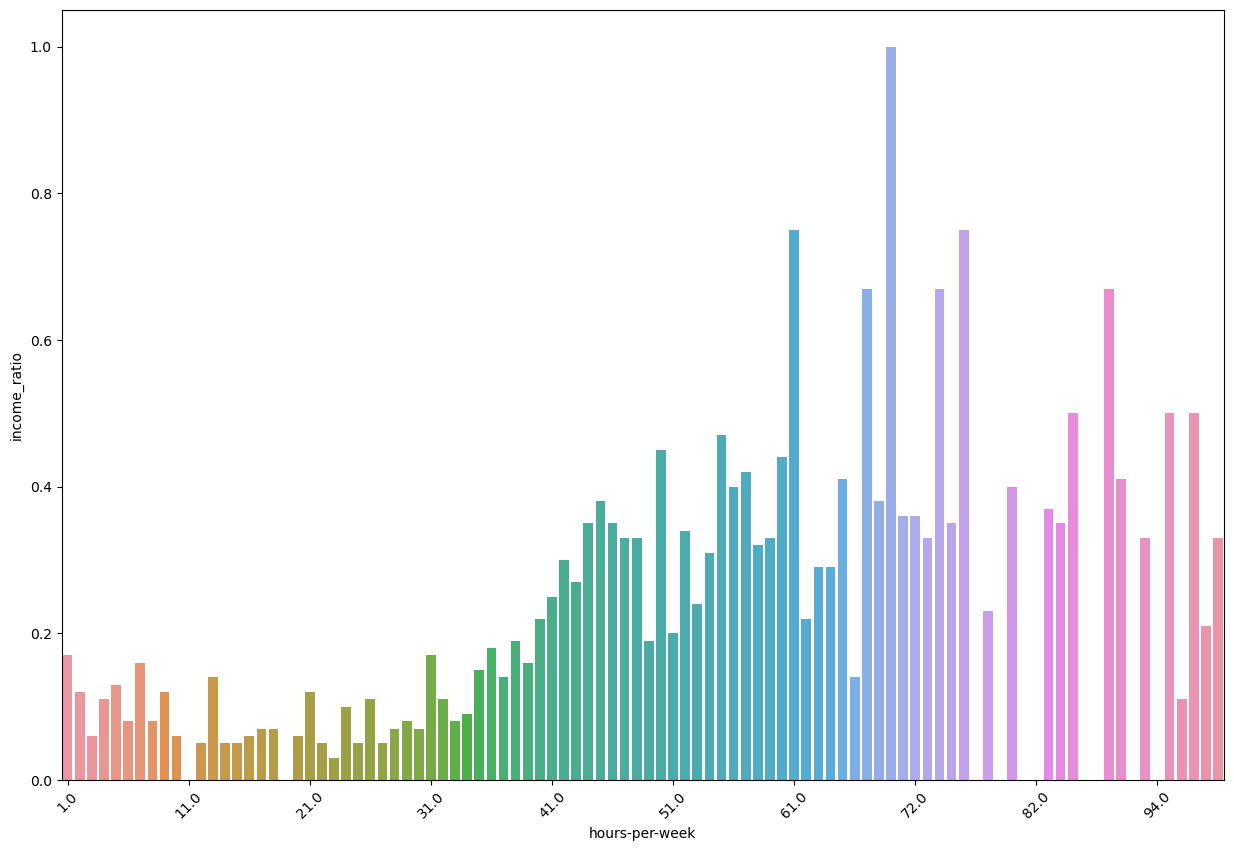

In [30]:
x_label = 'hours-per-week'
income_ratio = original_df[original_df['income'] == '>50K'].groupby(x_label).size() / original_df.groupby(x_label).size()
income_ratio = income_ratio.reset_index(name='income_ratio', inplace=False)
income_ratio['income_ratio'] = income_ratio['income_ratio'].fillna(0)
income_ratio['income_ratio'] = income_ratio['income_ratio'].apply(lambda x: round(x, 2))
print(income_ratio.head())
income_ratio.to_csv('hours per week - percent', index=False)

# barplot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=x_label, y='income_ratio', data=income_ratio)

# 设置横坐标每隔10个值显示一次
xticks_values = range(0, len(income_ratio[x_label]), 10)
xticks_labels = [income_ratio[x_label].iloc[i] for i in xticks_values]
ax.set_xticks(xticks_values)
ax.set_xticklabels(xticks_labels, rotation=45)  

plt.show()

看上去不太干活的收入相对较少, 但是也有挺多离群值存在

观察 education-num 的影响

   education-num  income_ratio
0            1.0          0.01
1            2.0          0.04
2            3.0          0.05
3            4.0          0.07
4            5.0          0.06


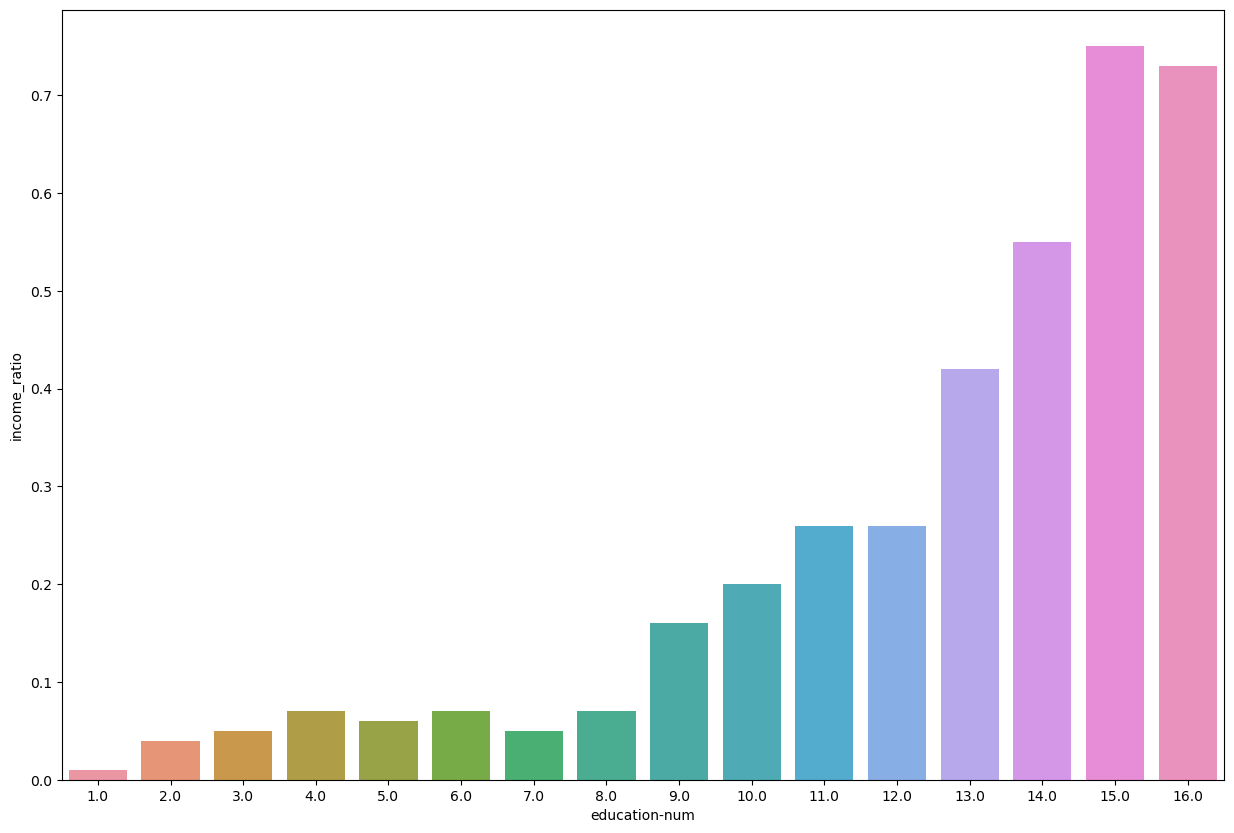

In [32]:
x_label = 'education-num'
income_ratio = original_df[original_df['income'] == '>50K'].groupby(x_label).size() / original_df.groupby(x_label).size()
income_ratio = income_ratio.reset_index(name='income_ratio', inplace=False)
income_ratio['income_ratio'] = income_ratio['income_ratio'].fillna(0)
income_ratio['income_ratio'] = income_ratio['income_ratio'].apply(lambda x: round(x, 2))
print(income_ratio.head())
income_ratio.to_csv('hours per week - percent', index=False)

# barplot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=x_label, y='income_ratio', data=income_ratio)

plt.show()

结果非常符合预期啊, 9年义务教育不学完, 收入之间寄; 高中毕业挣大钱, 难度不低; 大学到博士挣得比较多